In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 1.21G/1.21G [00:07<00:00, 125MB/s]
100% 1.21G/1.21G [00:07<00:00, 163MB/s]


In [9]:
! unzip gtzan-dataset-music-genre-classification.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [38]:
dataset = []
labels = []

In [37]:
import cv2
from tensorflow.keras.utils import img_to_array

def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    try:
      img_res=cv2.resize(img,(224,224))
      img_array = img_to_array(img_res)
      img_array = img_array/255.0
      dataset.append(img_array)
      if(label == 'blues'):
        labels.append('0')
      elif (label == 'classsical'):
        labels.append('1')
      elif (label == 'country'):
        labels.append('2')
      elif (label == 'disco'):
        labels.append('3')
      elif (label == 'hiphop'):
        labels.append('4')
      elif (label == 'jazz'):
        labels.append('5')
      elif (label == 'metal'):
        labels.append('6')
      elif (label == 'pop'):
        labels.append('7')
      elif (label == 'reggae'):
        labels.append('8')
      else:
        labels.append('9')

    except:
      print("error")

In [39]:
import numpy as np
from tqdm import tqdm
import os
## iterating over every audio file to extract features
## using MFCC
audio_dataset_path = '/content/Data/images_original'
for index_num,row in tqdm(metadata.iterrows()):
    if row['filename'] == 'jazz.00054.wav':
      continue
    else:
      f1 = str(row['filename'])
      f1 = f1[:-3]
      f11 = f1[:-7]
      # print(f11)
      f12 = f1[-6:]
      #print(f12)
      f1 = f11+f12
      f1= f1+"png"
      filename = os.path.join(os.path.abspath(audio_dataset_path),str(row['label'])+'/', f1)
      final_class_labels = row['label']
      prepare_Images(row['label'],filename)
      #print(filename)

590it [00:01, 352.93it/s]

file not found


1000it [00:02, 349.80it/s]


In [40]:
import pandas as pd

metadata = pd.read_csv('/content/Data/features_30_sec.csv')

In [11]:
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [41]:
len(dataset)

999

In [42]:
print(labels)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',

In [43]:
images = np.array(dataset)
label_arr = np.array(labels)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.20,random_state=44)

In [45]:
from keras.utils import np_utils
y_train= np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [33]:
x_train.shape

(799, 224, 224, 3)

In [34]:
y_test.shape

(200,)

In [35]:
y_train.shape

(799,)

In [47]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [48]:
import tensorflow
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)

Epoch 1/30
13/13 [==============================] - 15s 93ms/step - loss: 2.5036 - accuracy: 0.1001
Epoch 2/30
13/13 [==============================] - 1s 75ms/step - loss: 2.1727 - accuracy: 0.2040
Epoch 3/30
13/13 [==============================] - 1s 73ms/step - loss: 2.0494 - accuracy: 0.2353
Epoch 4/30
13/13 [==============================] - 1s 84ms/step - loss: 1.8908 - accuracy: 0.2954
Epoch 5/30
13/13 [==============================] - 1s 85ms/step - loss: 1.6750 - accuracy: 0.3805
Epoch 6/30
13/13 [==============================] - 1s 90ms/step - loss: 1.4860 - accuracy: 0.4593
Epoch 7/30
13/13 [==============================] - 1s 77ms/step - loss: 1.3256 - accuracy: 0.5169
Epoch 8/30
13/13 [==============================] - 1s 73ms/step - loss: 1.2741 - accuracy: 0.5494
Epoch 9/30
13/13 [==============================] - 1s 74ms/step - loss: 1.1427 - accuracy: 0.5995
Epoch 10/30
13/13 [==============================] - 1s 76ms/step - loss: 1.0655 - accuracy: 0.6383
Epoch 11

In [49]:
pred = model.predict(x_test)

model.evaluate(x_test,y_test)


7/7 [==============================] - 0s 14ms/step - loss: 1.2067 - accuracy: 0.7300


[1.2066731452941895, 0.7300000190734863]

In [50]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
score = round(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)),2)
print(score)

0.73


In [51]:
report = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           2       0.62      0.65      0.63        20
           3       0.61      0.55      0.58        20
           4       0.61      0.70      0.65        20
           5       0.81      0.85      0.83        20
           6       0.89      0.85      0.87        20
           7       0.94      0.80      0.86        20
           8       0.57      0.80      0.67        20
           9       0.83      0.75      0.79        40

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



In [52]:
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[12  1  2  1  2  1  0  1  0]
 [ 1 13  2  0  1  0  0  1  2]
 [ 0  2 11  4  0  0  1  1  1]
 [ 0  0  0 14  0  0  0  4  2]
 [ 0  2  0  0 17  0  0  1  0]
 [ 0  0  0  2  0 17  0  0  1]
 [ 0  1  1  1  0  0 16  1  0]
 [ 0  1  2  0  1  0  0 16  0]
 [ 4  1  0  1  0  1  0  3 30]]


<Axes: >

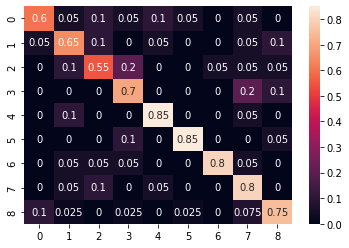

In [53]:
from sklearn.preprocessing import normalize
import seaborn as sns
normed_confusion_matrix = normalize(conMat , axis = 1, norm = 'l1')
cm_df = pd.DataFrame(normed_confusion_matrix)
sns.heatmap (cm_df , annot =True)

In [76]:
name = "/content/Bob-Marley-Is-This-Love-[TrendyBeatz.com].mp3"
hop_length = 512

n_fft = 2048
data,sampling_rate = librosa.load(name)
mel_spec = librosa.feature.melspectrogram(y = data.ravel(), sr=sampling_rate,hop_length = hop_length)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)


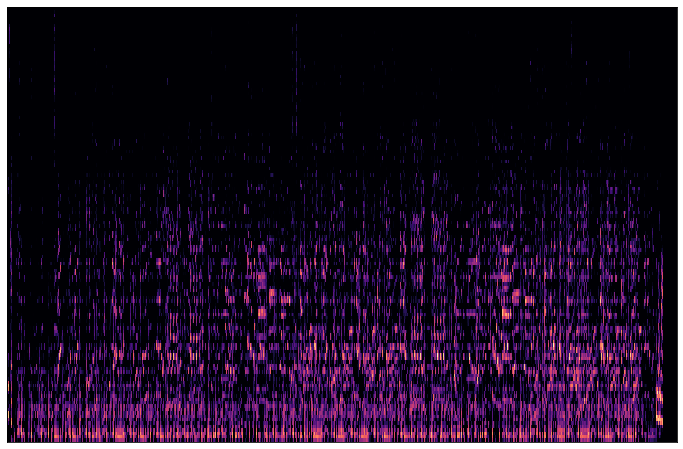

In [77]:
fig, ax = plt.subplots(1, figsize=(12,8))

img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, hop_length = hop_length,ax=ax)

fig.savefig('/content/Data/new'+ "/" + "img" + ".png")
        



In [78]:
img_path ='/content/Data/new/img.png'
img = cv2.imread(img_path)
img_res = cv2.resize(img, (224, 224))
img_array = img_to_array(img_res)
img_array = img_array / 255.0
predict = model.predict(img_array[np.newaxis, ...])
predict_class=np.argmax(predict,axis=1)
if(predict_class == 0):
  print("Genre is blues")
elif predict_class==1:
  print("Genre is classical")
elif predict_class==2:
  print("Genre is country")
elif predict_class==3:
  print("Genre is disco")
elif predict_class==4:
  print("Genre is hiphop")
elif predict_class==5:
  print("Genre is jazz")
elif predict_class==6:
  print("Genre is metal")
elif predict_class==7:
  print("Genre is pop")
elif predict_class==8:
  print("Genre is reggae")
else:
  print("Genre is rock")

1/1 [==============================] - 0s 20ms/step
Genre is reggae


In [79]:
model.save('/content/drive/MyDrive/saved_models/cnn_on_gtzan')
print('Model Saved!')

Model Saved!
